In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_uci.csv


In [38]:
import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [39]:
heart_disease_data = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
heart_disease_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [101]:
heart_disease_data.tail(5)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.0,NaN,1
916,62,Male,VA Long Beach,typical angina,132.286047,139.0,False,st-t abnormality,137.545665,False,0.878788,NaN,0.0,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.0,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,132.286047,385.0,True,lv hypertrophy,137.545665,False,0.878788,NaN,0.0,NaN,0
919,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,NaN,0.0,NaN,1


# Data investigation and cleaning

In [41]:
heart_disease_data.info()

# 'id' is not needed, data types ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [42]:
heart_disease_data.drop(['id'], axis=1, inplace=True)

In [43]:
heart_disease_data.describe()

# age limitation (28-77),trestbps&chol 0 values dont exist

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


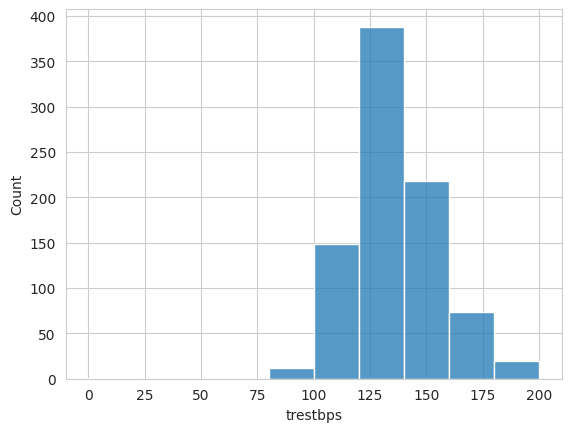

array([  0.,  80.,  92.,  94.,  95.,  96.,  98., 100., 101., 102., 104.,
       105., 106., 108., 110., 112., 113., 114., 115., 116., 117., 118.,
       120., 122., 123., 124., 125., 126., 127., 128., 129., 130., 132.,
       134., 135., 136., 138., 140., 142., 144., 145., 146., 148., 150.,
       152., 154., 155., 156., 158., 160., 164., 165., 170., 172., 174.,
       178., 180., 185., 190., 192., 200.,  nan])

In [44]:
sns.histplot(heart_disease_data, x='trestbps', bins=10)
plt.show()

np.sort(heart_disease_data['trestbps'].unique())

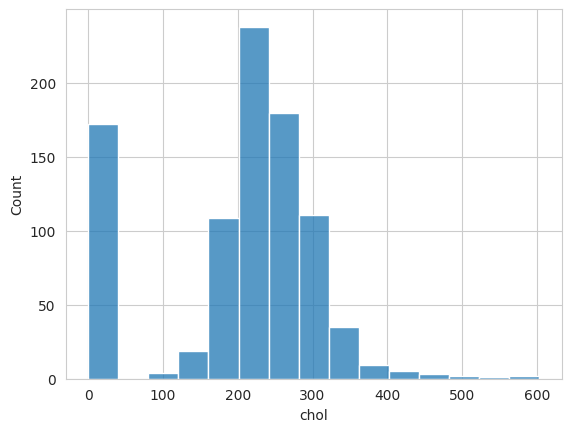

array([  0.,  85., 100., 117., 126., 129., 131., 132., 139., 141., 142.,
       147., 149., 153., 156., 157., 160., 161., 163., 164., 165., 166.,
       167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177.,
       178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 188.,
       190., 192., 193., 194., 195., 196., 197., 198., 199., 200., 201.,
       202., 203., 204., 205., 206., 207., 208., 209., 210., 211., 212.,
       213., 214., 215., 216., 217., 218., 219., 220., 221., 222., 223.,
       224., 225., 226., 227., 228., 229., 230., 231., 232., 233., 234.,
       235., 236., 237., 238., 239., 240., 241., 242., 243., 244., 245.,
       246., 247., 248., 249., 250., 251., 252., 253., 254., 255., 256.,
       257., 258., 259., 260., 261., 262., 263., 264., 265., 266., 267.,
       268., 269., 270., 271., 272., 273., 274., 275., 276., 277., 278.,
       279., 280., 281., 282., 283., 284., 285., 286., 287., 288., 289.,
       290., 291., 292., 293., 294., 295., 297., 29

In [45]:
sns.histplot(heart_disease_data, x='chol', bins=15)
plt.show()

np.sort(heart_disease_data['chol'].unique())

In [46]:
heart_disease_data[['chol', 'trestbps']] = heart_disease_data[['chol', 'trestbps']].replace(0, np.nan)

np.sort(heart_disease_data['trestbps'].unique())

array([ 80.,  92.,  94.,  95.,  96.,  98., 100., 101., 102., 104., 105.,
       106., 108., 110., 112., 113., 114., 115., 116., 117., 118., 120.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 132., 134.,
       135., 136., 138., 140., 142., 144., 145., 146., 148., 150., 152.,
       154., 155., 156., 158., 160., 164., 165., 170., 172., 174., 178.,
       180., 185., 190., 192., 200.,  nan])

In [47]:
cat_columns = heart_disease_data.select_dtypes('object').columns

for cat_column in cat_columns:
    print(f'{cat_column}: ', heart_disease_data[cat_column].unique())

sex:  ['Male' 'Female']
dataset:  ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp:  ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs:  [True False nan]
restecg:  ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang:  [False True nan]
slope:  ['downsloping' 'flat' 'upsloping' nan]
thal:  ['fixed defect' 'normal' 'reversable defect' nan]


# Visualizing data and relationships

<Axes: >

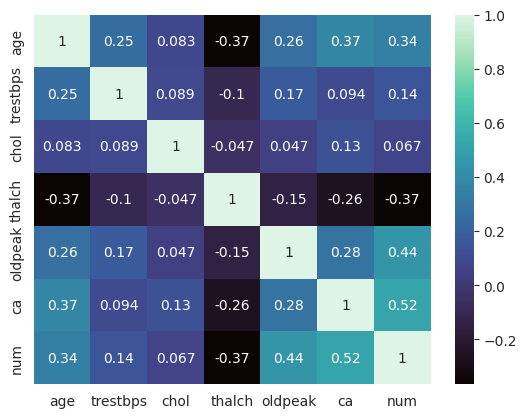

In [48]:
corr_data = heart_disease_data.corr(numeric_only=True)

sns.heatmap(corr_data, annot=True, cmap='mako')
# age, ST depression(oldpeak), major vessels (0-3) colored by flourosopy have moderate positive corr
# resting blood pressure, cholesterol level have weak positive corr
# maximum heart rate achieved has moderate negative corr

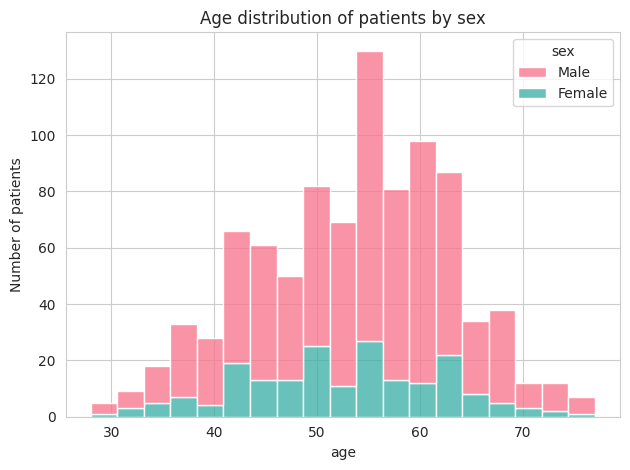

In [49]:
sns.histplot(heart_disease_data, x='age', hue='sex', multiple='stack', palette='husl')
plt.title('Age distribution of patients by sex')
plt.ylabel('Number of patients')
plt.tight_layout()
# men are more than women, so, it do not means that men have heart disease more often than women

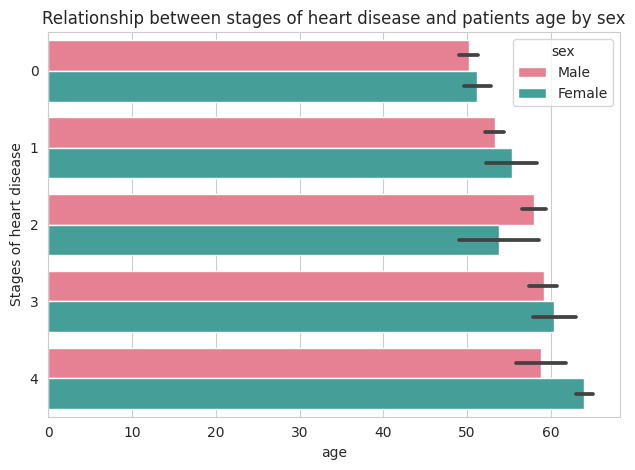

In [50]:
sns.barplot(data=heart_disease_data, x='age', y='num', orient='h', hue='sex', palette='husl')
plt.title('Relationship between stages of heart disease and patients age by sex')
plt.ylabel('Stages of heart disease')
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_36/2621214543.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


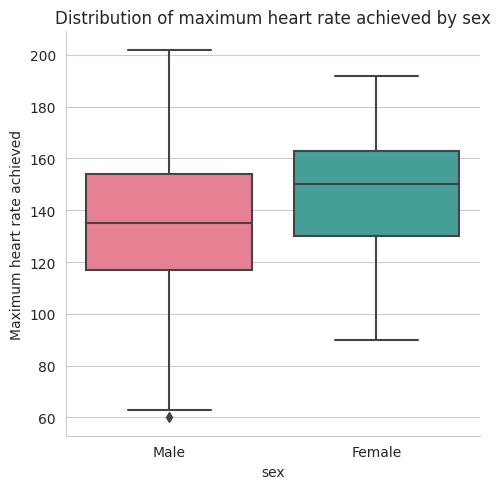

In [51]:
sns.catplot(data=heart_disease_data, x='sex', y='thalch', kind='box', palette='husl')
plt.title('Distribution of maximum heart rate achieved by sex')
plt.ylabel('Maximum heart rate achieved')
plt.tight_layout()
#women have in average higher maximum heart rate achieved

In [52]:
print('Maximum heart rate achieved summary statistics by sex:')
heart_disease_data[['thalch', 'sex']].groupby(['sex']).agg(['min', 'max', 'median', 'mean'])

Maximum heart rate achieved summary statistics by sex:


thalch                          
          min    max median        mean
sex                                    
Female   90.0  192.0  150.0  146.244792
Male     60.0  202.0  135.0  135.063893

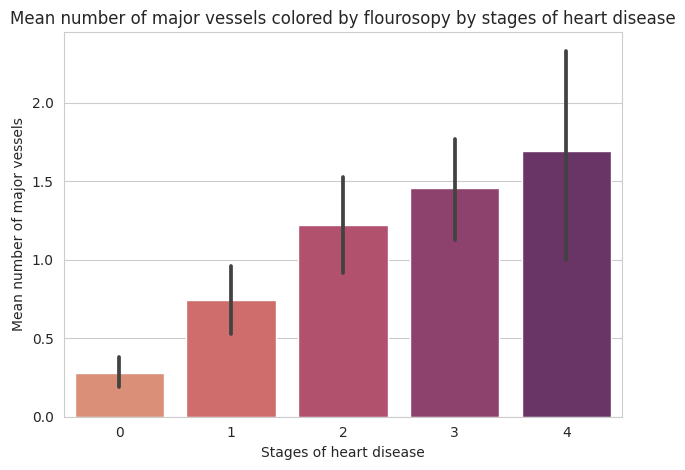

In [53]:
sns.barplot(heart_disease_data, x='num', y='ca', palette='flare')
plt.title('Mean number of major vessels colored by flourosopy by stages of heart disease')
plt.ylabel('Mean number of major vessels')
plt.xlabel('Stages of heart disease')
plt.tight_layout()
# mean of number of major vessels (0-3) colored by flourosopy becomes greater as heart disease is worse

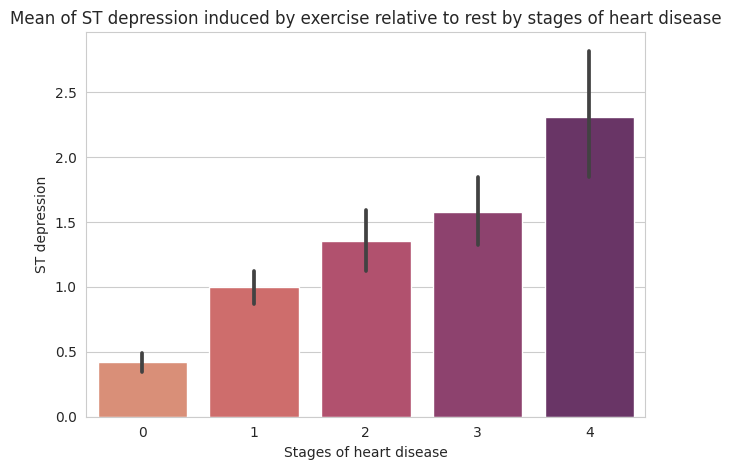

In [54]:
sns.barplot(heart_disease_data, x='num', y='oldpeak', palette='flare')
plt.title('Mean of ST depression induced by exercise relative to rest by stages of heart disease')
plt.ylabel('ST depression')
plt.xlabel('Stages of heart disease')
plt.tight_layout()
# ST depression becomes greater as heart disease is worse

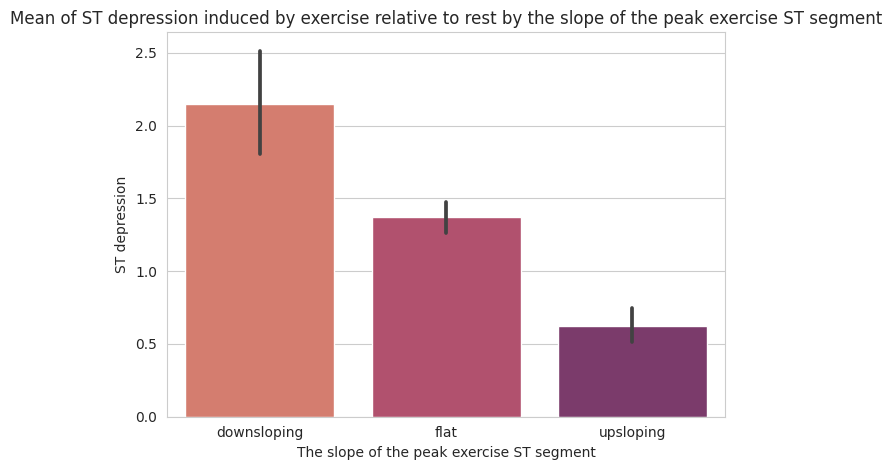

In [55]:
sns.barplot(heart_disease_data, x='slope', y='oldpeak', palette='flare')
plt.title('Mean of ST depression induced by exercise relative to rest by the slope of the peak exercise ST segment')
plt.ylabel('ST depression')
plt.xlabel('The slope of the peak exercise ST segment')
plt.tight_layout()

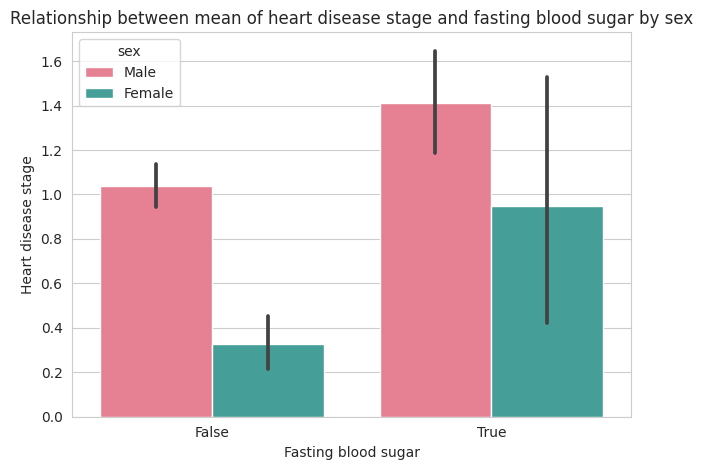

In [56]:
sns.barplot(heart_disease_data, x='fbs', y='num', hue='sex', palette='husl')
plt.title('Relationship between mean of heart disease stage and fasting blood sugar by sex')
plt.ylabel('Heart disease stage')
plt.xlabel('Fasting blood sugar')
plt.tight_layout()
# people with fasting blood sugar have grater mean of heart disease rate

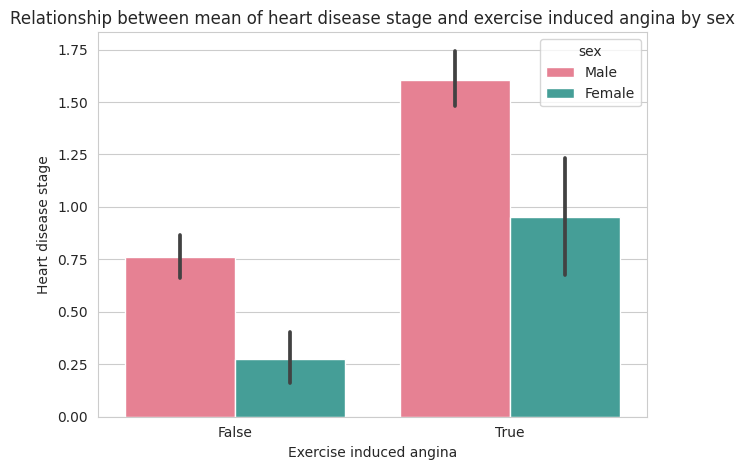

In [57]:
sns.barplot(heart_disease_data, x='exang', y='num', hue='sex', palette='husl')
plt.title('Relationship between mean of heart disease stage and exercise induced angina by sex')
plt.ylabel('Heart disease stage')
plt.xlabel('Exercise induced angina')
plt.tight_layout()
# exercise induced angina causes greater heart disease rate

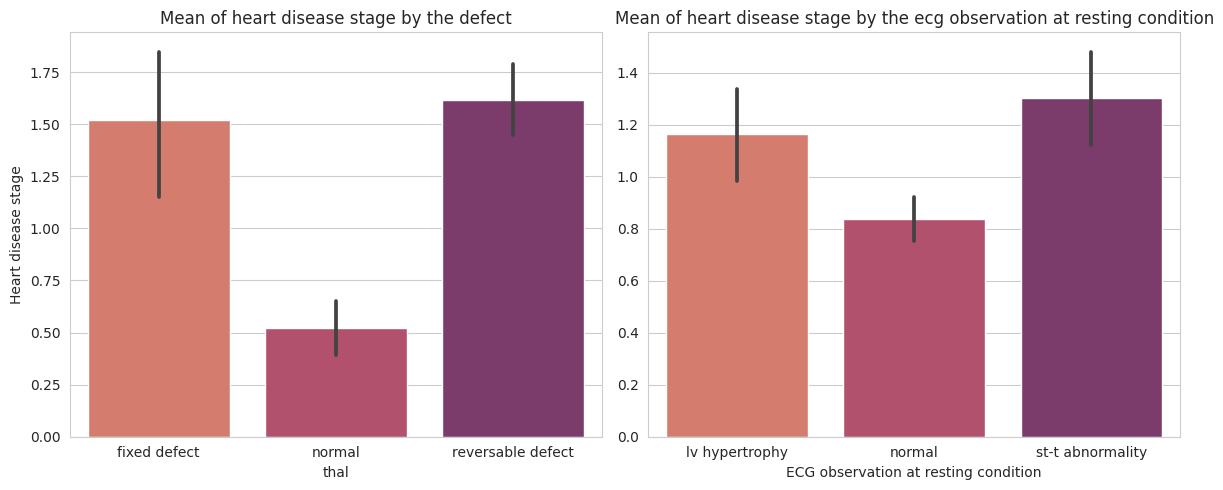

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(heart_disease_data, x='thal', y='num', palette='flare', ax=axes[0])
axes[0].set_title('Mean of heart disease stage by the defect')
axes[0].set_ylabel('Heart disease stage')

sns.barplot(heart_disease_data, x='restecg', y='num', palette='flare', ax=axes[1])
axes[1].set_title('Mean of heart disease stage by the ecg observation at resting condition')
axes[1].set_xlabel('ECG observation at resting condition')
axes[1].set_ylabel('')

plt.tight_layout()
# normal thal has smaller mean of heart disease rate

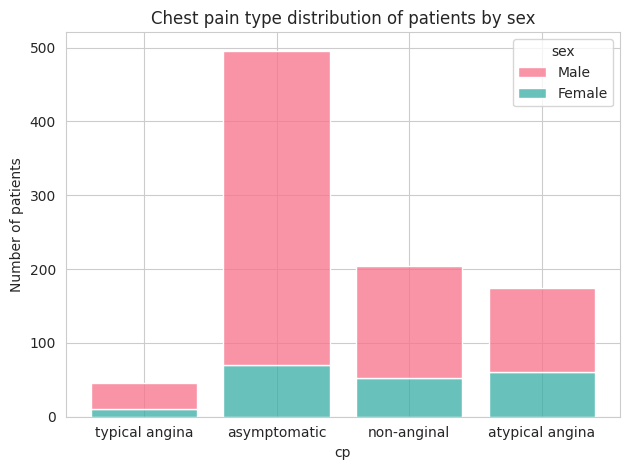

In [59]:
sns.histplot(heart_disease_data, x='cp', hue='sex', discrete=True, shrink=.8, multiple='stack', palette='husl')
plt.title('Chest pain type distribution of patients by sex')
plt.ylabel('Number of patients')
plt.tight_layout()
# most of the men have asymptomatic chest pain type

In [60]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

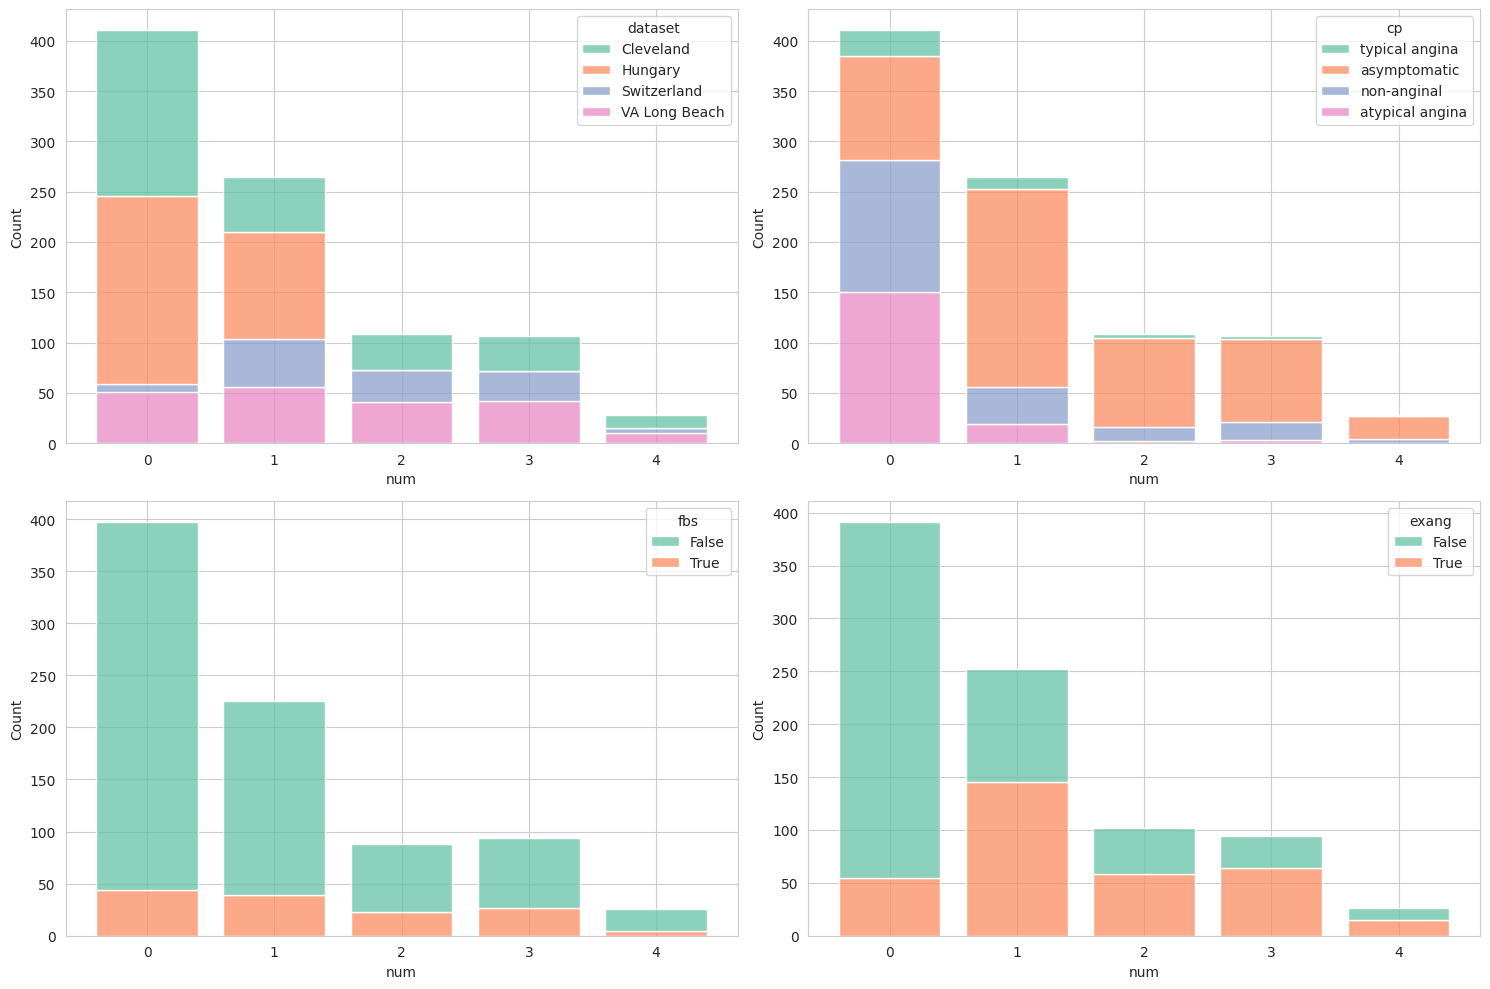

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
i, j = 0, 0

for cat_column in ['dataset', 'cp', 'fbs', 'exang']:
    sns.histplot(heart_disease_data, x='num', hue=cat_column, discrete=True, shrink=.8, ax=axes[i, j], multiple='stack', palette='Set2')
    j+=1
    if j == 2:
        i+=1
        j=0

fig.tight_layout()

# Dealing with missing values

In [62]:
heart_disease_data_cleaned = heart_disease_data

In [63]:
heart_disease_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  860 non-null    float64
 5   chol      718 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [64]:
heart_disease_data_cleaned.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.286047,246.832869,137.545665,0.878788,0.676375,0.995652
std,9.424685,18.536175,58.527062,25.926276,1.091226,0.935653,1.142693
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [65]:
#numeric columns

for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    heart_disease_data_cleaned[col] = heart_disease_data_cleaned[col].fillna(heart_disease_data[col].mean())
    print(col , heart_disease_data[col].mean())

heart_disease_data_cleaned['ca'] = heart_disease_data_cleaned['ca'].fillna(0)

trestbps 132.2860465116279
chol 246.83286908077994
thalch 137.5456647398844
oldpeak 0.8787878787878788


In [66]:
#categorical columns

for col in ['fbs', 'exang']:
    heart_disease_data_cleaned[col] = heart_disease_data_cleaned[col].fillna(False)

/tmp/ipykernel_36/3943211077.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_disease_data_cleaned[col] = heart_disease_data_cleaned[col].fillna(False)


In [67]:
heart_disease_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   918 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     611 non-null    object 
 12  ca        920 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(6)
memory usage: 95.4+ KB


# Encoding variables

In [68]:
'''
sex:  ['Male' 'Female']
dataset:  ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp:  ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs:  [True False nan]
restecg:  ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang:  [False True nan]
slope:  ['downsloping' 'flat' 'upsloping' nan]
thal:  ['fixed defect' 'normal' 'reversable defect' nan]
'''

"\nsex:  ['Male' 'Female']\ndataset:  ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']\ncp:  ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']\nfbs:  [True False nan]\nrestecg:  ['lv hypertrophy' 'normal' 'st-t abnormality' nan]\nexang:  [False True nan]\nslope:  ['downsloping' 'flat' 'upsloping' nan]\nthal:  ['fixed defect' 'normal' 'reversable defect' nan]\n"

In [69]:
heart_disease_data_encoded = pd.get_dummies(heart_disease_data_cleaned, columns=['dataset', 'cp', 'restecg', 'slope', 'thal'], dtype=int)

heart_disease_data_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,Male,145.0,233.0,True,150.0,False,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,Male,160.0,286.0,False,108.0,True,1.5,3.0,2,...,0,1,0,0,0,1,0,0,1,0
2,67,Male,120.0,229.0,False,129.0,True,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,Male,130.0,250.0,False,187.0,False,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,Female,130.0,204.0,False,172.0,False,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


In [70]:
heart_disease_data_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'ca', 'num', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['sex', 'fbs', 'exang']:
    heart_disease_data_encoded[col] = le.fit_transform(heart_disease_data_encoded[col])

heart_disease_data_encoded.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,1,150.0,0,2.3,0.0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,3.0,2,...,0,1,0,0,0,1,0,0,1,0
2,67,1,120.0,229.0,0,129.0,1,2.6,2.0,1,...,0,1,0,0,0,1,0,0,0,1
3,37,1,130.0,250.0,0,187.0,0,3.5,0.0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0.0,0,...,0,1,0,0,0,0,1,0,1,0


In [72]:
import joblib

joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

In [73]:
heart_disease_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   ca                        920 non-null    float64
 9   num                       920 non-null    int64  
 10  dataset_Cleveland         920 non-null    int64  
 11  dataset_Hungary           920 non-null    int64  
 12  dataset_Switzerland       920 non-null    int64  
 13  dataset_VA Long Beach     920 non-null    int64  
 14  cp_asympto

# Chosing a model

In [74]:
from sklearn.model_selection import train_test_split
import random

random.seed(8) 

X = heart_disease_data_encoded.drop('num', axis=1)
y = heart_disease_data_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [75]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [76]:
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

estimators = [HistGradientBoostingClassifier(scoring='recall', l2_regularization=0.1, learning_rate=0.05, max_depth=2, max_iter=90, max_leaf_nodes=10), 
              GradientBoostingClassifier(),
              RandomForestClassifier(class_weight='balanced'),
              XGBClassifier(objective='multi:softmax', num_class=5, gamma=3, learning_rate=0.6, max_depth=1, subsample=0.5),
              LGBMClassifier(objective='multiclass', class_weight='balanced', learning_rate=0.06, max_depth=2, n_estimators=100, num_leaves=4, verbose=-1)
             ]

metrics = []

for est in estimators:
    est = est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    metric = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    print(f'{est}: \n', classification_report(y_test, y_pred))
    metrics.append(metric)

HistGradientBoostingClassifier(l2_regularization=0.1, learning_rate=0.05,
                               max_depth=2, max_iter=90, max_leaf_nodes=10,
                               scoring='recall'): 
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       100
           1       0.39      0.49      0.44        61
           2       0.12      0.07      0.09        30
           3       0.53      0.26      0.35        34
           4       0.00      0.00      0.00         5

    accuracy                           0.53       230
   macro avg       0.35      0.33      0.33       230
weighted avg       0.50      0.53      0.51       230

GradientBoostingClassifier(): 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       100
           1       0.40      0.51      0.45        61
           2       0.22      0.13      0.17        30
           3       0.44      0.24      0.31        34
      

In [77]:
metrics

[(0.5039757280603963, 0.5347826086956522, 0.5082611347203767, None),
 (0.5208154207384681, 0.5478260869565217, 0.5252243820150313, None),
 (0.5210975781298877, 0.5260869565217391, 0.5123576239225713, None),
 (0.5279282007745578, 0.5347826086956522, 0.5188410541414796, None),
 (0.5897140831758033, 0.5391304347826087, 0.5601421021140806, None)]

In [78]:
# Save the model
joblib.dump(estimators[-1], 'lgbm_model.pkl')

# To load the model later
#loaded_model_joblib = joblib.load('lgbm_model.pkl')

['lgbm_model.pkl']

# Hyperparameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {
    'learning_rate': [0.05, 0.1], 
    'max_iter': [80, 90, 100], 
    'max_leaf_nodes': [10, 15], 
    'max_depth': [1, 2, 3],
    'l2_regularization': [0.05, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=HistGradientBoostingClassifier(scoring='recall'),
                           param_grid=param_grid,
                           scoring='recall_weighted',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(scoring='recall'),
             param_grid={'l2_regularization': [0.05, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1], 'max_depth': [1, 2, 3],
                         'max_iter': [80, 90, 100],
                         'max_leaf_nodes': [10, 15]},
             scoring='recall_weighted', verbose=1)

In [81]:
print('Best parameters found: ', grid_search.best_params_)
print('Best cross-validation recall score: ', grid_search.best_score_)

Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.05, 'max_depth': 2, 'max_iter': 90, 'max_leaf_nodes': 10}
Best cross-validation recall score:  0.6144927536231884


In [82]:
# param_grid = {
#     'max_depth': [1, 2, 3],
#     'learning_rate': [0.3, 0.4, 0.5, 0.6],
#     'subsample': [0.5, 0.6, 0.7],
#     'gamma': [1, 2, 3, 4],
# }

# grid_search = GridSearchCV(estimator=XGBClassifier(objective='multi:softmax', num_class=5),
#                            param_grid=param_grid,
#                            scoring='recall_weighted',
#                            cv=5,
#                            verbose=1)

# grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             param_grid={'gamma': [1, 2, 3, 4],
                         'learning_rate': [0.3, 0.4, 0.5, 0.6],
                         'max_depth': [1, 2, 3], 'subsample': [0.5, 0.6, 0.7]},
             scoring='recall_weighted', verbose=1)

In [83]:
# print('Best parameters found: ', grid_search.best_params_)
# print('Best cross-validation recall score: ', grid_search.best_score_)

Best parameters found:  {'gamma': 3, 'learning_rate': 0.6, 'max_depth': 1, 'subsample': 0.5}
Best cross-validation recall score:  0.6246376811594203


In [84]:
# param_grid = {
#     'max_depth': [1, 2, 3],
#     'num_leaves': [3, 4, 5],
#     'learning_rate': [0.06, 0.07, 0.08],
#     'n_estimators': [90, 100, 110]
# }

# grid_search = GridSearchCV(estimator=LGBMClassifier(objective='multiclass', class_weight='balanced', verbose=-1),
#                            param_grid=param_grid,
#                            scoring='recall_weighted',
#                            cv=5,
#                            verbose=1)

# grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced',
                                      objective='multiclass', verbose=-1),
             param_grid={'learning_rate': [0.06, 0.07, 0.08],
                         'max_depth': [1, 2, 3], 'n_estimators': [90, 100, 110],
                         'num_leaves': [3, 4, 5]},
             scoring='recall_weighted', verbose=1)

In [85]:
# print('Best parameters found: ', grid_search.best_params_)
# print('Best cross-validation recall score: ', grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.07, 'max_depth': 2, 'n_estimators': 100, 'num_leaves': 4}
Best cross-validation recall score:  0.5739130434782609


# Deep learning model

In [86]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(8)

2025-09-11 15:03:41.375953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757603021.628512      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757603021.702861      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
num_classes = y_train.nunique()

y_train_one_hot = tf.one_hot(y_train, depth=num_classes)
y_test_one_hot = tf.one_hot(y_test, depth=num_classes)

2025-09-11 15:03:56.554201: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [89]:
input_shape = (X_train_scaled.shape[1],)
print('Input shape: ', input_shape)

Input shape:  (26,)


In [90]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(64, activation='elu'),
    layers.Dense(32, activation='elu'),
    layers.Dense(16, activation='elu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', 
             metrics=[tf.keras.metrics.F1Score(average='weighted'), tf.keras.metrics.Recall()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/tmp/checkpoint.weights.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_filepath,
    save_weights_only=True,
    monitor='val_f1_score',
    mode='max',
    save_best_only=True
)

In [92]:
model.fit(X_train_scaled, y_train_one_hot, 
          batch_size=16, epochs=30, 
          validation_split=0.2,
          callbacks=[model_checkpoint_callback])

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - f1_score: 0.3842 - loss: 1.6564 - recall: 0.1100 - val_f1_score: 0.5545 - val_loss: 1.0674 - val_recall: 0.4122
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5402 - loss: 1.0190 - recall: 0.4411 - val_f1_score: 0.5695 - val_loss: 0.9434 - val_recall: 0.4662
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.5755 - loss: 0.8991 - recall: 0.4636 - val_f1_score: 0.5889 - val_loss: 0.9108 - val_recall: 0.4797
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.5879 - loss: 0.8564 - recall: 0.4800 - val_f1_score: 0.5649 - val_loss: 0.8959 - val_recall: 0.5000
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6077 - loss: 0.8287 - recall: 0.4868 - val_f1_score: 0.5954 - val_loss: 0.8898 - val_recall: 0.4932
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - f1_score: 0.6121 - loss: 0.8072 - recall: 0.4982 - val_f1_score: 0.5966 - val_loss: 0.8891 - val_recall: 0.5000
Epoch 7/30
37/3

In [93]:
model.load_weights(checkpoint_filepath)

loss, f1_score, recall = model.evaluate(X_test_scaled, y_test_one_hot)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.4996 - loss: 1.0699 - recall: 0.4079 


# Model interpretability

In [94]:
final_model = estimators[-1]
final_model

LGBMClassifier(class_weight='balanced', learning_rate=0.06, max_depth=2,
               num_leaves=4, objective='multiclass', verbose=-1)

In [95]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        81
           1       0.54      0.44      0.49        43
           2       0.29      0.37      0.33        27
           3       0.35      0.32      0.33        28
           4       0.00      0.00      0.00         5

    accuracy                           0.55       184
   macro avg       0.40      0.38      0.39       184
weighted avg       0.58      0.55      0.56       184



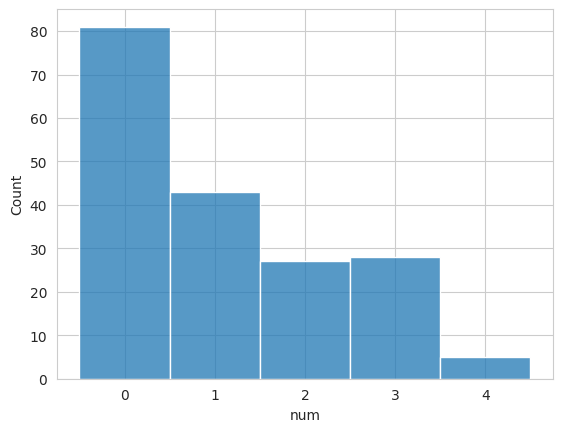

In [96]:
ax = sns.histplot(y_test, discrete=True)

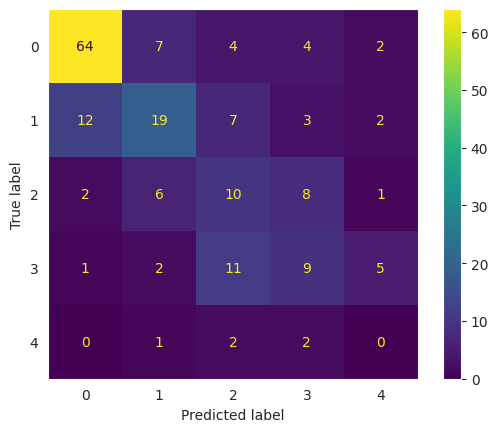

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style('dark')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# healthy people - actual 75+10+8+5+2=100, predicted 75 (true negative)
# healthy, but predicted ill - 25 (false positive)
# ill people, but predicted healthy - 14+2+1=17 (false negative)
# all other ill - 113 (true positive)

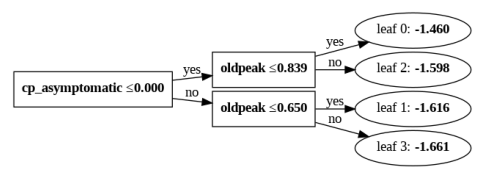

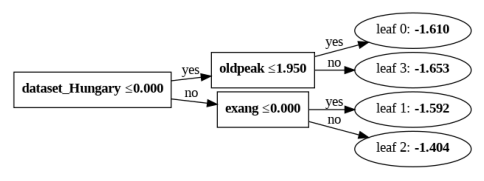

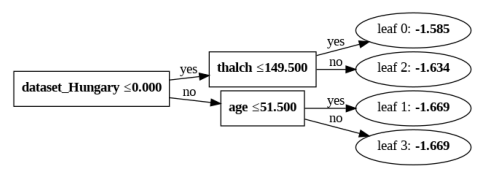

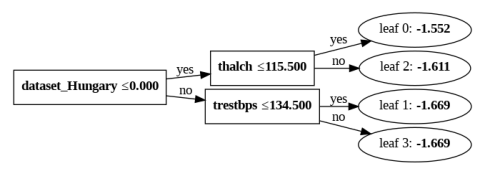

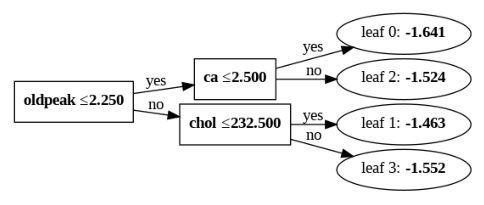

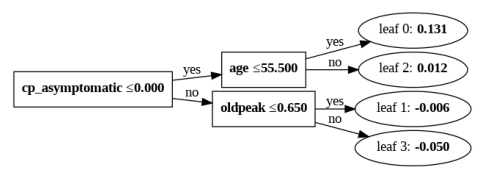

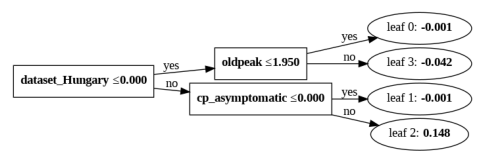

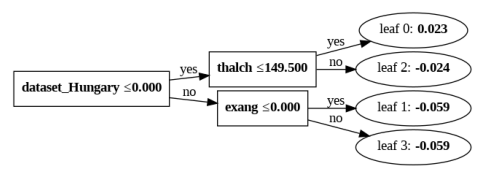

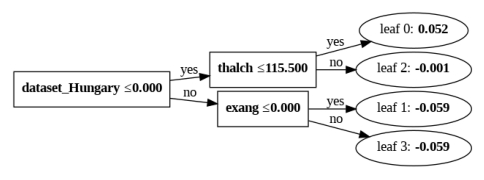

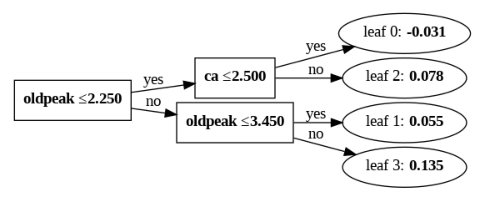

In [98]:
import lightgbm as lgb

for i in range(10):
    lgb.plot_tree(final_model,figsize=(6,8), tree_index=i)

<Axes: title={'center': 'LightGBM Feature Importance (Gain)'}, xlabel='Feature importance', ylabel='Features'>

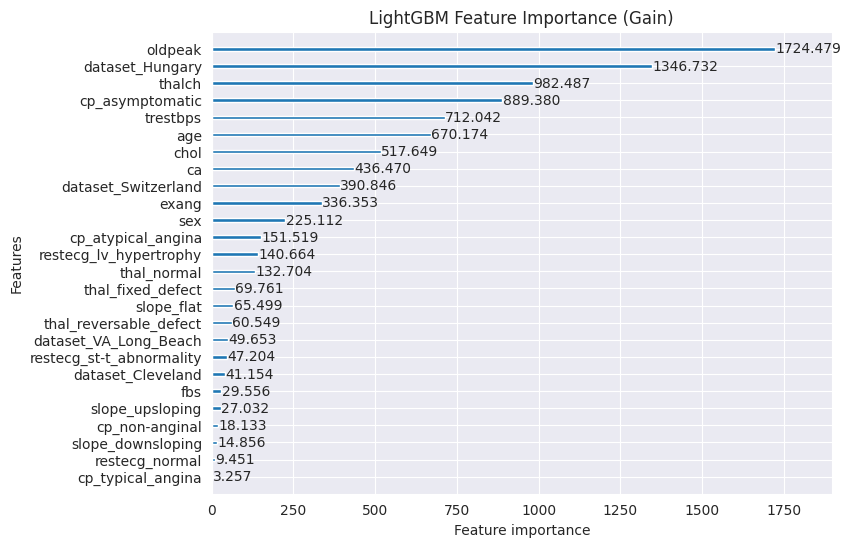

In [99]:
lgb.plot_importance(final_model, importance_type='gain', figsize=(8, 6), title='LightGBM Feature Importance (Gain)')

<Axes: title={'center': 'LightGBM Feature Importance (Split)'}, xlabel='Feature importance', ylabel='Features'>

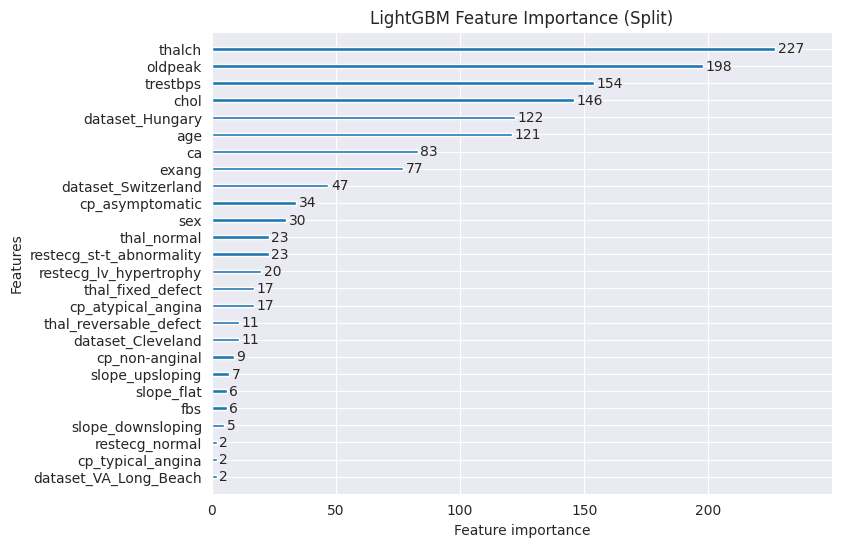

In [100]:
lgb.plot_importance(final_model, importance_type='split', figsize=(8, 6), title='LightGBM Feature Importance (Split)')